In [99]:
import pickle
import numpy as np
import matplotlib
import matplotlib.path as mplPath
import matplotlib.pyplot as plt
import os
import math
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors

sarco =  True
fatigue = False

if sarco:
    name = '2024_02_17_18_56_59'
    env_name = 'myoSarcLegReachFixed-v3'
elif fatigue:
    name = '2024_02_20_15_03_01'
    env_name = 'myoFatiLegReachFixed-v4'
else:
    name = '2024_02_17_20_19_05'
    env_name = 'myoLegReachFixed-v2'
steps = 1000
pkl_path = './output/PKL/' + env_name + '/'
ep = 100


def load_pickle(file_path):
    with open(file_path, 'rb') as file:
        return pickle.load(file)

image_path = './image/' + env_name + '/' + name
os.makedirs(image_path, exist_ok=True)

bins = [ 10, 20, 30, 40, 50, 60]

In [100]:
stand = []
fall = []
for i in range(ep):
    file_path = pkl_path + name+f'_{i}.pkl'  # Replace with actual file paths
    data = load_pickle(file_path)
    height = data['bodyInfo']['height']
    if height > 0.5:
        stand.append(data.copy())
    else:
        fall.append(data.copy())

(0.01, 100)

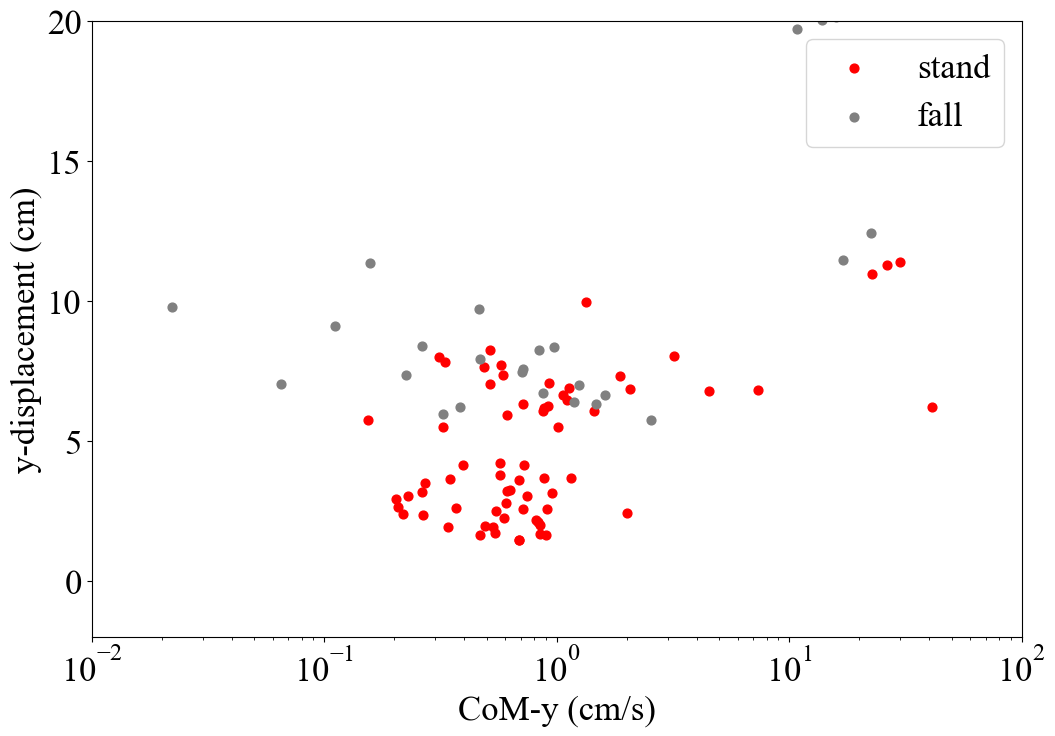

In [101]:
max_y_pos_stand = []
max_y_vel_stand = []
max_y_pos_fall = []
max_y_vel_fall = []
for data in stand:
    y = np.abs([arr[1] for arr in data["bodyInfo"]["com"][100:]])
    max_y_pos_stand.append(max(y)*100 - 8)
    index = np.argmax(y)
    y_v = np.abs([arr[1] for arr in data["bodyInfo"]["com_v"][100:]])
    max_y_vel_stand.append(y_v[index]*100)

for m in fall:
    z = np.abs(np.array([arr[2] for arr in m["bodyInfo"]["com_v"][100:]]))
    max_z = np.argmax(np.abs(z) >= 0.1)
    y = np.abs([arr[1] for arr in m["bodyInfo"]["com"][100:100+max_z]])
    max_y_pos_fall.append(max(y)*100 - 8)
    index = np.argmax(y)
    y_v = np.abs([arr[1] for arr in m["bodyInfo"]["com_v"][100:]])
    max_y_vel_fall.append(y_v[index]*100)


plt.rcParams.update({
    "font.family": "Times New Roman",  # specify font family here
    "font.size":25}) 


fig, axes = plt.subplots(ncols=1, nrows=1, figsize = (12, 8))
plt.scatter(max_y_vel_stand, max_y_pos_stand, label = 'stand', s= 40, color = 'red')
plt.scatter(max_y_vel_fall, max_y_pos_fall, label = 'fall', s = 40, color = 'grey')
plt.xscale('log')
plt.legend()
plt.ylabel('y-displacement (cm)')
plt.xlabel('CoM-y (cm/s)')
plt.ylim([-2, 20])
plt.xlim([10**(-2), 10**2])

In [102]:
print(max_y_pos_fall)
print(max_y_vel_fall)
print(max_y_pos_stand)
print(max_y_vel_stand)

[20.535355507843345, 7.471107772651656, 6.661368370786782, 9.802014235846322, 7.3632244089876195, 19.729709720886, 6.725722414904684, 7.038791341862662, 11.36667515134372, 7.029692946889789, 20.492270275923133, 20.68585273784677, 5.763160865602298, 7.578224290835301, 20.151407010859465, 5.97384147000427, 9.744999802625145, 12.435892367813683, 20.751266384846602, 9.11614800872946, 8.405059115230198, 20.806806107301362, 11.484588451315982, 6.247972506536039, 6.40384713988607, 8.25421259521098, 20.526401553307153, 8.388319149840417, 20.058638059736257, 7.932898776084587, 6.336875199445947]
[20.16471554301543, 0.7127470261341983, 1.612984898541733, 0.022277008514506612, 0.2242516678214851, 10.828777318738378, 0.8701535421163855, 0.06553847610604381, 0.15715486400971063, 1.2450231919492256, 18.510006704522993, 20.4137262445581, 2.536208872125454, 0.7170275960044802, 15.844882613104216, 0.3237656521288793, 0.4641409382661075, 22.426891854334556, 20.831661831017083, 0.11140154816409192, 0.263